In [36]:
import os
import glob
import pandas as pd
from PIL import Image
import numpy as np

In [4]:
def create_image_data_csv(root_dir, csv_file_path):
    data = []

    # Pattern to match all image files
    pattern = os.path.join(root_dir, '*', '*', '*.*')  
    
    for img_path in glob.glob(pattern):
        # Extract art movement and artist from the path
        parts = img_path.split(os.sep)
        art_movement, artist = parts[-3], parts[-2]
        data.append([img_path, art_movement, artist])

    # Create a DataFrame and save to CSV
    df = pd.DataFrame(data, columns=['Image_Path', 'Art_Movement', 'Artist'])
    df.to_csv(csv_file_path, index=False)

create_image_data_csv('../data/WikiArt', '../data/wikiart_image_data.csv')


In [5]:
df_art = pd.read_csv('../data/wikiart_image_data.csv')

In [6]:
df_art.head()

,Image_Path,Art_Movement,Artist
0,../data/WikiArt/expressionism/paul-klee/the-go...,expressionism,paul-klee
1,../data/WikiArt/expressionism/paul-klee/error-...,expressionism,paul-klee
2,../data/WikiArt/expressionism/paul-klee/fruits...,expressionism,paul-klee
3,../data/WikiArt/expressionism/paul-klee/puppet...,expressionism,paul-klee
4,../data/WikiArt/expressionism/paul-klee/growth...,expressionism,paul-klee


In [45]:
with Image.open("../data/WikiArt/expressionism/georg-tappert/nyassa-1929.jpg") as img:
    # Resize image
    img = img.resize((128, 128))

In [46]:
img_array = np.asarray(img)

In [47]:
img_array.shape

(128, 128, 3)

In [24]:
img_array = img_array / 255.0

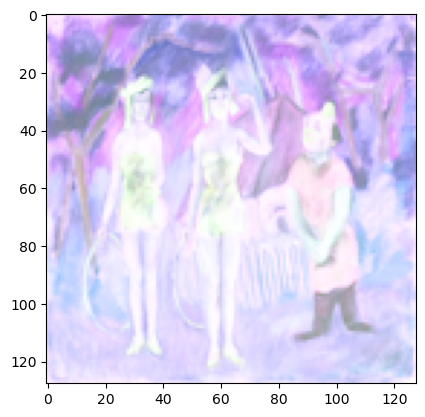

In [40]:
import matplotlib.pyplot as plt

plt.imshow(img_array)

In [41]:
img = Image.fromarray((img_array * 255).astype(np.uint8))

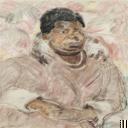

In [50]:
img.convert('RGB')

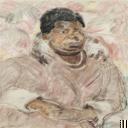

In [49]:
img